<div align="center" style="font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 100px; border-radius: 10px; width: 80%; margin: auto;">
    <h2 style="font-size: 24px; font-weight: bold; text-decoration: underline;">Лабораторная работа №6 (Проведение исследований с моделями классификации)</h2>
    <div style="font-size: 18px; margin-top: 20px; text-align: left;">
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Выбор начальных условий:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Выбрать набор данных для задачи классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача).</li>
            <li>- Выбрать метрики качества и обосновать их выбор.</li>
        </ul>
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Создание бейзлайна и оценка качества:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Обучить модели из sklearn (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
        </ul>
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Улучшение бейзлайна:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.).</li>
            <li>- Проверить гипотезы.</li>
            <li>- Сформировать улучшенный бейзлайн по результатам проверки гипотез.</li>
            <li>- Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество моделей с улучшенным бейзлайном (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
            <li>- Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2.</li>
            <li>- Сделать выводы.</li>
        </ul>
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Имплементация алгоритма машинного обучения:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии).</li>
            <li>- Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
            <li>- Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2.</li>
            <li>- Сделать выводы.</li>
            <li>- Добавить техники из улучшенного бейзлайна (пункт 3с).</li>
            <li>- Обучить модели (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
            <li>- Сравнить результаты моделей в сравнении с результатами из пункта 3.</li>
            <li>- Сделать выводы.</li>
        </ul>
    </div>
</div>


### Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

from torchvision.models import resnet18, vit_b_32, vit_l_16


print(torch.__version__) 
print(torch.cuda.is_available())  
print(torch.cuda.get_device_name(0))



2.2.2+cu118
True
NVIDIA GeForce RTX 3060 Laptop GPU


In [2]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-light.mplstyle')
# plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')

try: 
    plt.rcParams.update({
        'text.usetex': True,
        'text.latex.preamble': r'\usepackage[utf8]{inputenc}\usepackage[russian]{babel}',
        'axes.labelsize': 21, # названия осей 
        'xtick.labelsize': 16, # значения осей 
        'ytick.labelsize': 16, # значения осей
        'legend.fontsize': 16,  
        'axes.titlesize': 16,
    })
except: 
    plt.rcParams.update({
        'axes.labelsize': 21, # названия осей 
        'xtick.labelsize': 16, # значения осей 
        'ytick.labelsize': 16, # значения осей
        'legend.fontsize': 16,  
        'axes.titlesize': 16,
    })


<div align="center" style="font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 90px; border-radius: 10px; width: 90%; margin: auto;">
    <div style="font-size: 18px; margin-top: 20px; text-align: left;">
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">1.1: Выбор данных для классификации</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li><a href="https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data" style="color: #2E64FE; font-weight: bold;">Brain MRI Images for Brain Tumor Detection</a></li>
            <li>Набор данных представляет собой коллекцию МРТ-изображений головного мозга, разделённых на два класса:  

- **Tumor** – изображения с опухолью  
- **No Tumor** – изображения без опухоли

### Основные характеристики набора данных:
- **Бинарная классификация:** Набор делится на два класса, что позволяет решать задачу классификации, направленную на автоматическое определение наличия или отсутствия опухоли.
- **Размер выборки:** В данном наборе содержится порядка 98 изображений с опухолью и 155 изображений без опухоли, что создаёт достаточно реалистичный дисбаланс классов, характерный для медицинских данных.
- **Формат изображений:** Изображения выполнены в формате МРТ, что обеспечивает высокое качество визуализации внутренних структур мозга и является стандартной методикой для диагностики в неврологии и онкологии.
- **Практическая значимость:** Ранняя диагностика опухолей мозга критически важна для своевременного лечения и улучшения прогноза пациентов. Автоматизация этого процесса с помощью моделей машинного обучения может существенно ускорить диагностику и снизить нагрузку на врачей.

**Реальная практическая задача:**  
   Выбор данного датасета обоснован его прямой связью с медицинской диагностикой. Автоматическое распознавание опухолей на МРТ изображениях является одной из наиболее актуальных задач в медицине, поскольку своевременная диагностика способствует более эффективному лечению.
</li>
        </ul>
    </div>
</div>


<div align="center" style="font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 20px; border-radius: 60px; width: 80%;">
    <div style="font-size: 18px; text-align: left;">
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Оценка моделей:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li><strong>Метрики для классификации:</strong> Accuracy, F1-Score, и ROC-AUC.</li>
            <li><strong>F1-Score</strong> будет решающей метрикой для классификации, так как классы не сбалансированы.</li>
        </ul>
    </div>
</div>


#### Загрузка данных для классификации

In [3]:
import kagglehub

path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ilya\.cache\kagglehub\datasets\navoneel\brain-mri-images-for-brain-tumor-detection\versions\1


In [4]:
cd C:\Users\ilya\.cache\kagglehub\datasets\navoneel\brain-mri-images-for-brain-tumor-detection\versions\1

C:\Users\ilya\.cache\kagglehub\datasets\navoneel\brain-mri-images-for-brain-tumor-detection\versions\1


In [5]:
ls

 ��� � ���ன�⢥ C �� ����� ��⪨.
 ��਩�� ����� ⮬�: ACC0-6DC7

 ����ন��� ����� C:\Users\ilya\.cache\kagglehub\datasets\navoneel\brain-mri-images-for-brain-tumor-detection\versions\1

10.04.2025  07:57    <DIR>          .
10.04.2025  07:57    <DIR>          ..
10.04.2025  07:57    <DIR>          brain_tumor_dataset
10.04.2025  07:57    <DIR>          no
10.04.2025  07:57    <DIR>          yes
               0 䠩���              0 ����
               5 �����   8�701�976�576 ���� ᢮�����


In [6]:
tumor_dir = "C:/Users/ilya/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/no"
no_tumor_dir = "C:/Users/ilya/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/yes"

In [7]:
import os

num_tumor = len(os.listdir(tumor_dir))
num_no_tumor = len(os.listdir(no_tumor_dir))

print(f"Number of Tumor images: {num_tumor}")
print(f"Number of No-Tumor images: {num_no_tumor}")

Number of Tumor images: 98
Number of No-Tumor images: 155


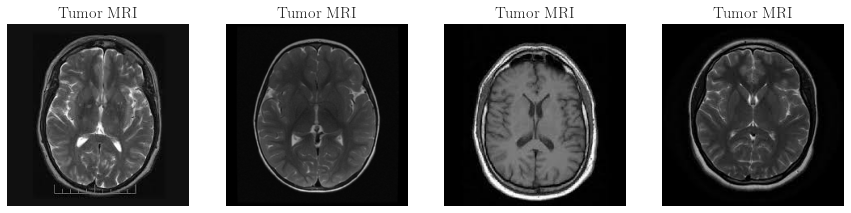

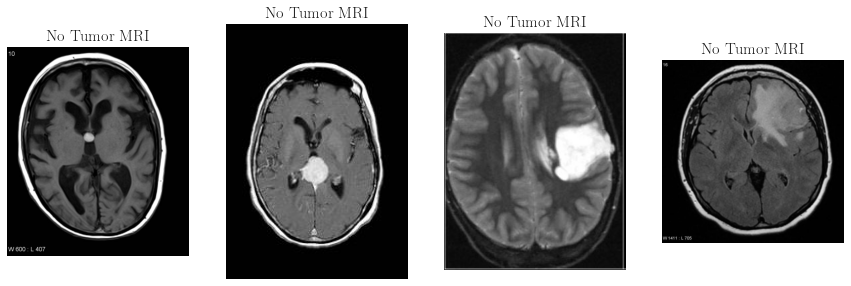

In [8]:
import cv2
import random

#display images
def show_images(folder, title, num_images=4):
    images = random.sample(os.listdir(folder), num_images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(title)
    
    plt.show()

show_images(tumor_dir, "Tumor MRI")
show_images(no_tumor_dir, "No Tumor MRI")

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
resnet_model = resnet18(weights=None)
resnet_model.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 2) # 10 классов
resnet_model = resnet_model.to(device)

# Vision Transformer
vit_model = vit_b_32(weights=None, image_size=160)
vit_model.conv_proj = nn.Conv2d(3, vit_model.conv_proj.out_channels, kernel_size=32, stride=32)
vit_model.heads.head = nn.Linear(vit_model.heads.head.in_features, 2)
vit_model = vit_model.to(device)

In [11]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [12]:
class BrainMRIDataset(Dataset):
    def __init__(self, tumor_dir, no_tumor_dir, transform=None):
        self.tumor_dir = tumor_dir
        self.no_tumor_dir = no_tumor_dir
        self.transform = transform
        self.tumor_images = [os.path.join(tumor_dir, img) for img in os.listdir(tumor_dir)]
        self.no_tumor_images = [os.path.join(no_tumor_dir, img) for img in os.listdir(no_tumor_dir)]
        self.images = self.tumor_images + self.no_tumor_images
        self.labels = [1] * len(self.tumor_images) + [0] * len(self.no_tumor_images)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [13]:
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [14]:
dataset = BrainMRIDataset(tumor_dir, no_tumor_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
def train(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds.append(outputs.argmax(dim=1).cpu().numpy())
            targets.append(labels.cpu().numpy())
    preds = np.concatenate(preds)
    targets = np.concatenate(targets)
    acc = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds, average='macro')
    return acc, f1

criterion = nn.CrossEntropyLoss()

def run_training(model, train_loader, test_loader, epochs=5, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        train_loss = train(model, train_loader, optimizer, criterion)
        acc, f1 = evaluate(model, test_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {acc:.4f}, F1: {f1:.4f}")


In [35]:
resnet_model = resnet18(weights=None)
resnet_model.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 2) # 10 классов
resnet_model = resnet_model.to(device)

print("Training ResNet:")
run_training(resnet_model, train_loader, test_loader)

Training ResNet:
Epoch 1/5, Loss: 0.9583, Accuracy: 0.6667, F1: 0.4502
Epoch 2/5, Loss: 0.6397, Accuracy: 0.2549, F1: 0.2523
Epoch 3/5, Loss: 0.4924, Accuracy: 0.8039, F1: 0.7903
Epoch 4/5, Loss: 0.3238, Accuracy: 0.7843, F1: 0.7536
Epoch 5/5, Loss: 0.1796, Accuracy: 0.4314, F1: 0.3850


In [16]:
def run_training(model, train_loader, test_loader, epochs=5, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        model.eval()
        y_true, y_pred = [], []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {acc:.4f}, F1: {f1:.4f}")


In [22]:
print("Training ViT:")
run_training(vit_model, train_loader, test_loader)


Training ViT:
Epoch 1/5, Loss: 4.7870, Accuracy: 0.4314, F1: 0.3014
Epoch 2/5, Loss: 0.9095, Accuracy: 0.5882, F1: 0.5547
Epoch 3/5, Loss: 0.6561, Accuracy: 0.5686, F1: 0.3625
Epoch 4/5, Loss: 0.6340, Accuracy: 0.5686, F1: 0.3625
Epoch 5/5, Loss: 0.6035, Accuracy: 0.5686, F1: 0.3625


## Добавим сильные аугментации + подберем гиперпараметры:

In [17]:
class BrainMRIDataset_Aug(Dataset):
    def __init__(self, tumor_dir, no_tumor_dir, test_size=0.2, transform_train=None, transform_test=None):
        # Пути к изображениям
        self.tumor_dir = tumor_dir
        self.no_tumor_dir = no_tumor_dir
        self.transform_train = transform_train
        self.transform_test = transform_test
        
        # Получение путей к изображениям
        tumor_images = [os.path.join(tumor_dir, img) for img in os.listdir(tumor_dir)]
        no_tumor_images = [os.path.join(no_tumor_dir, img) for img in os.listdir(no_tumor_dir)]
        
        self.images = tumor_images + no_tumor_images
        self.labels = [1] * len(tumor_images) + [0] * len(no_tumor_images)

        # Разделение на тренировочные и тестовые данные
        self.train_images, self.test_images, self.train_labels, self.test_labels = train_test_split(
            self.images, self.labels, test_size=test_size, random_state=42)
        
    def __len__(self):
        return len(self.train_images)  # Количество элементов в тренировочном датасете

    def __getitem__(self, idx):
        # Выбор изображений для тренировки
        img_path = self.train_images[idx]
        label = self.train_labels[idx]
        
        image = Image.open(img_path).convert('RGB')
        
        if self.transform_train:
            image = self.transform_train(image)
        elif self.transform_test:
            image = self.transform_test(image)
        
        return image, label

In [18]:
transform_train_aug = transforms.Compose([
    # Случайное горизонтальное переворачивание
    transforms.RandomHorizontalFlip(),
    
    # Случайная обрезка с масштабированием (crop and scale)
    transforms.RandomResizedCrop(160, scale=(0.8, 1.0)),
    
    # Случайный поворот
    transforms.RandomRotation(15),
    
    # Случайная яркость, контрастность и насыщенность
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test_aug  = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


---




### Пояснение:
1. **RandomHorizontalFlip:** случайное горизонтальное переворачивание с вероятностью 50%. Это помогает модели обобщать информацию, независимо от того, на какой стороне объекта находится интересующая нас особенность (например, опухоль).
   
2. **RandomResizedCrop:** случайное изменение масштаба и обрезка. Это позволяет модели лучше справляться с изображениями, которые могут быть представлены в разных масштабах.

3. **RandomRotation:** случайный поворот изображения на угол до 15 градусов, что помогает модели быть более устойчивой к различным ориентациям объекта.

4. **ColorJitter:** случайные изменения яркости, контрастности и насыщенности, чтобы модель была более устойчива к вариативности освещенности на изображениях.

5. **Normalize:** нормализация с использованием стандартных значений для изображений, обученных на ImageNet. Это помогает улучшить сходимость модели и ускоряет обучение.

---

In [19]:
train_dataset = BrainMRIDataset_Aug(tumor_dir=tumor_dir, 
                                no_tumor_dir=no_tumor_dir,
                                transform_train=transform_train_aug,
                                transform_test=transform_test_aug)

test_dataset = BrainMRIDataset_Aug(tumor_dir=tumor_dir, 
                               no_tumor_dir=no_tumor_dir,
                               transform_train=None,
                               transform_test=transform_test_aug)

train_loader_aug = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_aug  = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)



In [36]:
print("Retraining ResNet with Augmentation:")
resnet_model_improved = resnet18(weights=None)
resnet_model_improved.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
resnet_model_improved.fc = nn.Linear(resnet_model_improved.fc.in_features, 2)
resnet_model_improved = resnet_model_improved.to(device)
run_training(resnet_model_improved, train_loader_aug , test_loader_aug )

Retraining ResNet with Augmentation:
Epoch 1/5, Loss: 1.1960, Accuracy: 0.5545, F1: 0.4173
Epoch 2/5, Loss: 0.7020, Accuracy: 0.5792, F1: 0.5755
Epoch 3/5, Loss: 0.5848, Accuracy: 0.6881, F1: 0.5727
Epoch 4/5, Loss: 0.5161, Accuracy: 0.8267, F1: 0.8252
Epoch 5/5, Loss: 0.4219, Accuracy: 0.7624, F1: 0.7098


In [21]:
print("Retraining ViT with Augmentation:")
vit_model_improved = vit_b_32(weights=None, image_size=160)
vit_model_improved.conv_proj = nn.Conv2d(3, vit_model_improved.conv_proj.out_channels, kernel_size=32, stride=32)
vit_model_improved.heads.head = nn.Linear(vit_model_improved.heads.head.in_features, 2)
vit_model_improved = vit_model_improved.to(device)
run_training(vit_model_improved, train_loader_aug , test_loader_aug )

Retraining ViT with Augmentation:
Epoch 1/5, Loss: 3.4433, Accuracy: 0.6139, F1: 0.3804
Epoch 2/5, Loss: 0.7094, Accuracy: 0.4356, F1: 0.3682
Epoch 3/5, Loss: 0.7109, Accuracy: 0.6139, F1: 0.3804
Epoch 4/5, Loss: 0.6279, Accuracy: 0.6881, F1: 0.6824
Epoch 5/5, Loss: 0.6091, Accuracy: 0.7129, F1: 0.7023


---

Имплементация алгоритма машинного обучения 

---

In [25]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),  # Изменили 1 на 3
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*40*40, 128),  
            nn.ReLU(),
            nn.Linear(128, 2)  
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x


In [26]:
simple_cnn = SimpleCNN().to(device)

print("Training Simple CNN:")
run_training(simple_cnn, train_loader, test_loader)

Training Simple CNN:
Epoch 1/5, Loss: 5.0839, Accuracy: 0.3529, F1: 0.2609
Epoch 2/5, Loss: 0.6591, Accuracy: 0.6471, F1: 0.3929
Epoch 3/5, Loss: 0.6739, Accuracy: 0.7451, F1: 0.7302
Epoch 4/5, Loss: 0.5684, Accuracy: 0.7451, F1: 0.7302
Epoch 5/5, Loss: 0.5068, Accuracy: 0.7647, F1: 0.7484


In [28]:
simple_cnn = SimpleCNN().to(device)

print("Training Simple CNN Augmentation:")
run_training(simple_cnn, train_loader_aug , test_loader_aug)

Training Simple CNN Augmentation:
Epoch 1/5, Loss: 3.4267, Accuracy: 0.6139, F1: 0.3804
Epoch 2/5, Loss: 0.6254, Accuracy: 0.7475, F1: 0.6932
Epoch 3/5, Loss: 0.6354, Accuracy: 0.7970, F1: 0.7752
Epoch 4/5, Loss: 0.5833, Accuracy: 0.7772, F1: 0.7656
Epoch 5/5, Loss: 0.5503, Accuracy: 0.7475, F1: 0.7468


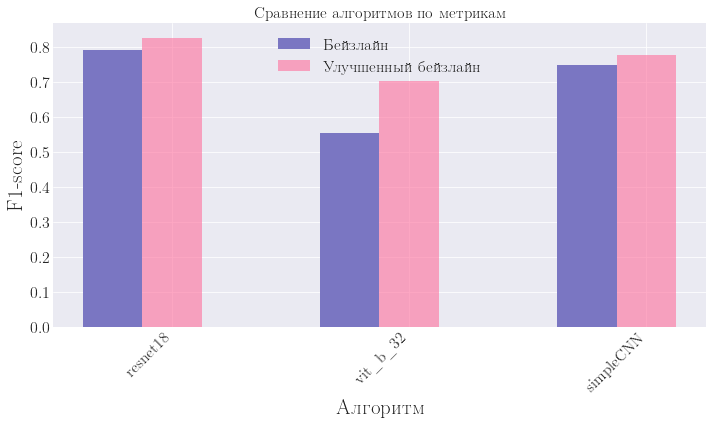

In [27]:

algorithms = [
    "resnet18", "vit_b_32", 'simpleCNN'
]


baseline = [
    0.7903, 0.5547, 0.7484
]

improved_baseline = [
    0.8252, 0.7023, 0.7752
]


x = np.arange(len(algorithms))
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, baseline, width, label='Бейзлайн')
rects2 = ax.bar(x, improved_baseline, width, label='Улучшенный бейзлайн')

ax.set_xlabel('Алгоритм')
ax.set_ylabel('F1-score')
ax.set_title('Сравнение алгоритмов по метрикам')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


---

В итоге получилось сделать предикативную модель для рапсознования анамалей в мозге. 

Чтобы улучшить производительность модели, добавил сильные аугментации, и использовал такие методы, как случайные обрезки, повороты, перевороты, изменения яркости и контрастности. Эти аугментации помогли модели быть более устойчивой и обобщенной.

Также стоить отметить, что моя имплементация  более устойчивая чем resnet18 на этих данных
